In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
game=pd.read_csv(r"C:\Users\Dear User\OneDrive\桌面\hahow-商業分析\階層分群\Game_Log.csv")
user=pd.read_csv(r"C:\Users\Dear User\OneDrive\桌面\hahow-商業分析\階層分群\User_Table.csv")

In [13]:
#1.數據處理
info = pd.DataFrame()
info["Isnull"] = game.isnull().sum()
info.insert(1, "IsNa",game.isna().sum(), True)
info.insert(2, "Duplicate", game.duplicated().sum(), True)
info.insert(3, "Unique", game.nunique(), True)
info.insert(4, "count", game.count(), True)
print(info)

          Isnull  IsNa  Duplicate  Unique  count
User_Id        0     0          0     920   4600
Min_Aft        0     0          0      71   4600
Min_Eve        0     0          0     106   4600
Min_Mid        0     0          0     194   4600
Buy_Coin       0     0          0     323   4600
Buy_Dia        0     0          0     463   4600
Buy_Car        0     0          0     301   4600


In [167]:
game_new = game.groupby('User_Id').agg({
    "Min_Aft":["mean"],
    "Min_Eve":["mean"],
    "Min_Mid":["mean"],
    "Buy_Coin":["mean"],
    "Buy_Dia":["mean"],
    "Buy_Car":["mean"]
}).reset_index()

game_new.columns = ["User_Id",'Aft', 'Eve', 'Mid', 'Buy_Coin', 'Buy_Dia', 'Buy_Car']
print(len(game_new))
print(len(user))
print(game_new)

920
920
        User_Id   Aft   Eve    Mid  Buy_Coin  Buy_Dia  Buy_Car
0    021ViplNqr  16.4  80.2    8.2     176.8     28.0      0.0
1    03DaAFruM2  13.8  80.8    6.0     264.8     20.0      8.0
2    0AqrYZIKVB  15.2  76.2    7.2     228.8     20.0      4.0
3    0Cw2x0rNm9  47.8  17.4   18.4       6.8      0.0     13.0
4    0JhnZ3cyxP  13.2  83.4    5.6     182.6     20.0      3.2
..          ...   ...   ...    ...       ...      ...      ...
915  zddE9Vt5v3  41.2  39.4   39.6      18.0     17.0    257.0
916  zoPLZ1eZPD  13.2  73.6    7.8     209.8     20.0      0.0
917  zs8XSoqV79   4.8  10.0  113.4       0.0    578.6     29.8
918  ztJz2mddgZ  47.4  14.6   18.6       0.0      0.0      0.0
919  zwaxmpXnqk  13.4  75.8    7.4     171.4     32.0      3.6

[920 rows x 7 columns]


In [24]:
#2.數據探索(EDA)
game_table=pd.merge(game_new, user, on="User_Id", how="inner")
summary = game_table.describe(include='all')
print(summary)


non_numeric_columns = ["Identity", "Telecom"]
for column in non_numeric_columns:
    value_counts = game_table[column].value_counts()
    print(f"分布情况 for 列 {column}:\n{value_counts}\n")


           User_Id         Aft         Eve         Mid    Buy_Coin  \
count          920  920.000000  920.000000  920.000000  920.000000   
unique         920         NaN         NaN         NaN         NaN   
top     021ViplNqr         NaN         NaN         NaN         NaN   
freq             1         NaN         NaN         NaN         NaN   
mean           NaN   25.193043   47.281522   34.813913   85.003043   
std            NaN   16.960548   30.224488   40.485061   92.694522   
min            NaN    3.800000    8.600000    5.200000    0.000000   
25%            NaN   13.800000   15.200000    7.200000    2.000000   
50%            NaN   16.000000   41.600000   19.000000   18.000000   
75%            NaN   41.200000   79.000000   39.650000  182.650000   
max            NaN   59.800000   95.200000  161.200000  268.600000   

           Buy_Dia     Buy_Car Identity Telecom  
count   920.000000  920.000000      920     920  
unique         NaN         NaN        3       2  
top      

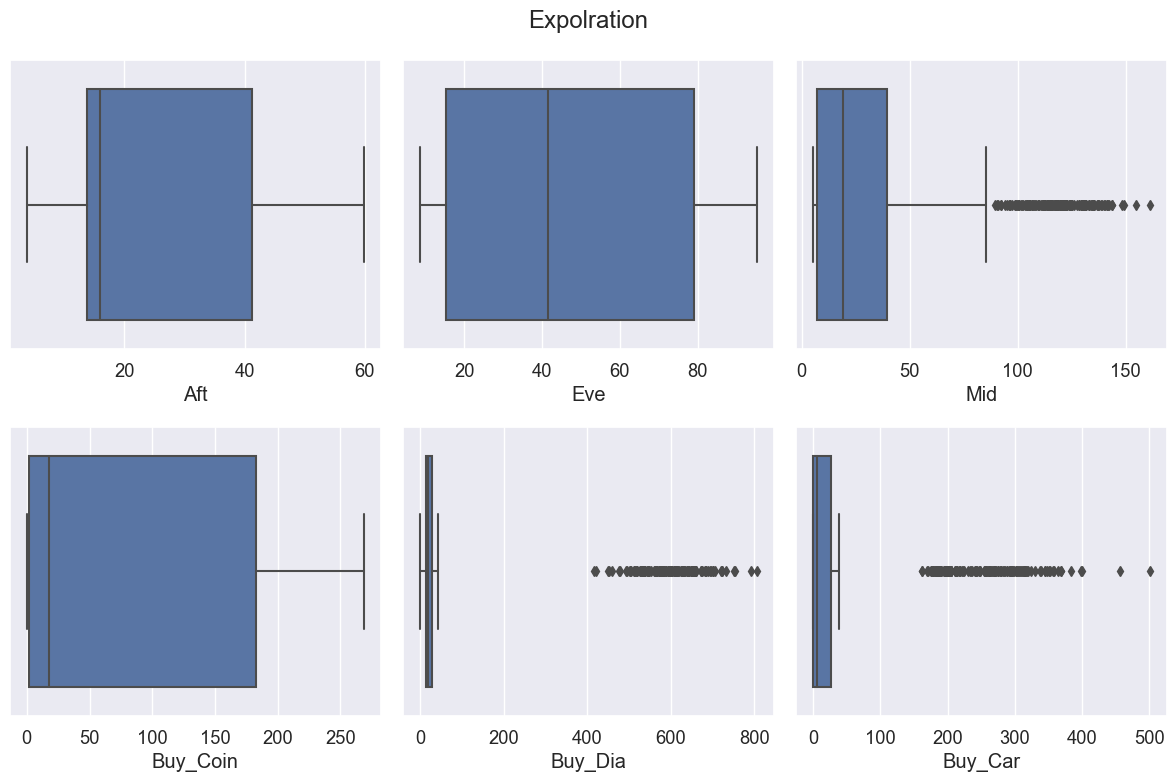

In [100]:
columns_to_plot = game_new.columns.tolist()
columns_to_plot = columns_to_plot[1:]
num_row=2
num_col=3

fig,axes=plt.subplots(num_row,num_col,figsize=(12,8))
fig.suptitle("Expolration")

for i, col_name in enumerate(columns_to_plot):
    row = i // num_col
    col = i % num_col
    sns.boxplot(x=game_new[col_name], ax=axes[row, col])
    
if row == 0:
        axes[row, col].set_title(col_name)
    
for i in range(num_col):
    axes[1, i].set_title('')

plt.tight_layout()
plt.show()

##遊玩時間(單位:分鐘/minu)
#-傍晚接近常態分布,對稱、均勻
#-中午呈左偏態,部分玩家拉低平均時數
#-午夜遊玩時間不穩定,有離群值且有玩家遊玩時數較少拉低中位數導致亦呈左偏

##虛擬寶物金額(美金/$)
#-coin(金幣)偏向左偏,有些玩家購買金額偏少,但大部分玩家都有購買金幣
#-dia(鑽石)、car(儲值卡)只有少部分玩家會購買,且金額巨大,造成圖表中的離群值
  #但相較之下,付費巨大的玩家在鑽石上花費教多的金額

#下一階段以相關性矩陣查看各變數機的相關性


In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_normalize = game_table.columns[1:7]
normalized_data = game_table.copy()
normalized_data[columns_to_normalize] = scaler.fit_transform(game_table[columns_to_normalize])
dummytable = pd.get_dummies(game_table, columns=['Identity', 'Telecom'])


columns_to_replace = normalized_data.columns[1:7]  
# print(columns_to_replace)
dummytable[columns_to_replace] = normalized_data[columns_to_replace]
dummytable = dummytable.drop('User_Id', axis=1)
dummytable = dummytable.drop('Telecom_ABC', axis=1)
dummytable = dummytable.drop('Identity_Normal', axis=1)
print(dummytable)

          Aft       Eve       Mid  Buy_Coin   Buy_Dia   Buy_Car  \
0    0.225000  0.826790  0.019231  0.658228  0.034722  0.000000   
1    0.178571  0.833718  0.005128  0.985853  0.024802  0.015968   
2    0.203571  0.780600  0.012821  0.851824  0.024802  0.007984   
3    0.785714  0.101617  0.084615  0.025316  0.000000  0.025948   
4    0.167857  0.863741  0.002564  0.679821  0.024802  0.006387   
..        ...       ...       ...       ...       ...       ...   
915  0.667857  0.355658  0.220513  0.067014  0.021081  0.512974   
916  0.167857  0.750577  0.016667  0.781087  0.024802  0.000000   
917  0.017857  0.016166  0.693590  0.000000  0.717510  0.059481   
918  0.778571  0.069284  0.085897  0.000000  0.000000  0.000000   
919  0.171429  0.775982  0.014103  0.638124  0.039683  0.007186   

     Identity_Novice  Identity_Veteran  Telecom_other  
0                  0                 0              1  
1                  1                 0              1  
2                  1       

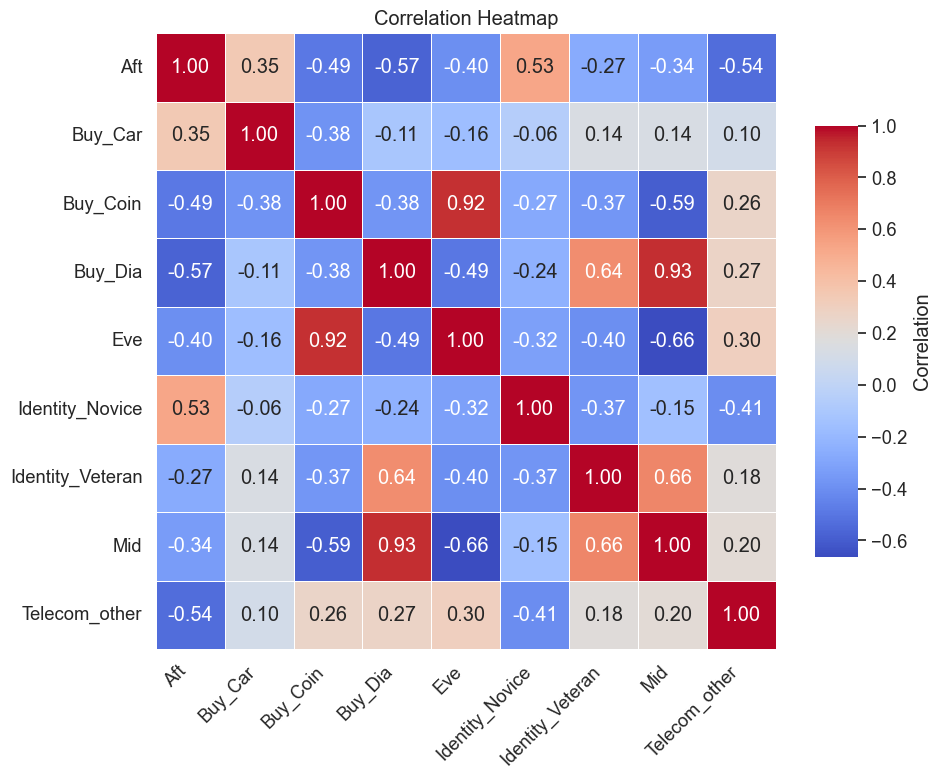

In [144]:
correlation_matrix =dummytable.corr()
comatrix = correlation_matrix.stack().reset_index()
comatrix.columns = ['Var1', 'Var2', 'value']

#
import matplotlib.colors as mcolors  

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
cmap = plt.get_cmap('coolwarm') 
boundaries = np.arange(-1, 1.5, 0.5)  

norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)

heatmap = sns.heatmap(data=comatrix.pivot_table(index='Var1', columns='Var2', values='value'),
                      cmap='coolwarm', 
                      fmt=".2f", 
                      linewidths=0.5,  
                      cbar=True,  
                      annot=True,
                      cbar_kws={"orientation": "vertical", 
                                "shrink": 0.7,  
                                "aspect": 10})  

plt.xticks(rotation=45, ha="right")

cbar = heatmap.collections[0].colorbar
cbar.set_label("Correlation")

plt.xlabel("")
plt.ylabel("")
plt.title("Correlation Heatmap")
plt.show()

##假說
#時間性
#1.傍晚時會購買金幣:.92
#2.凌晨買鑽石:.93

#玩家行為
#1.熟手購買鑽石 :.64
#2.普通玩家在傍晚出現:.64
#3.熟手在凌晨出現:.66


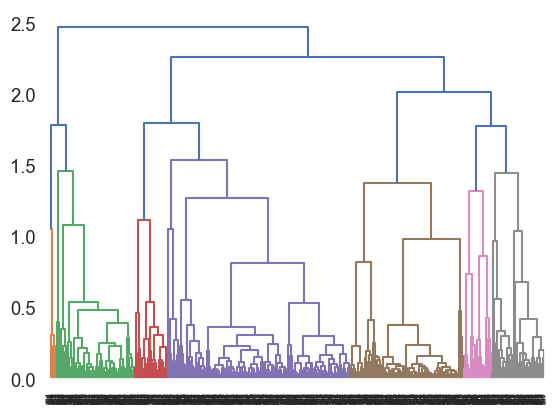

In [145]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

np.random.seed(500)


distance = pdist(dummytable, metric="euclidean")

hierarchical_clusters = linkage(distance, method="complete")


dendrogram(hierarchical_clusters)
plt.show()

In [147]:
num_clusters = 3

np.random.seed(500)


kmeans = KMeans(n_clusters=num_clusters)
K = kmeans.fit_predict(dummytable)

ClusterResult = pd.concat([dummytable, pd.Series(K, name="Cluster")], axis=1)


ClusterResult.rename(columns={ClusterResult.columns[-1]: "Cluster"}, inplace=True)


print(ClusterResult["Cluster"].value_counts())


C:\Users\Dear User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dear User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


2    445
1    253
0    222
Name: Cluster, dtype: int64


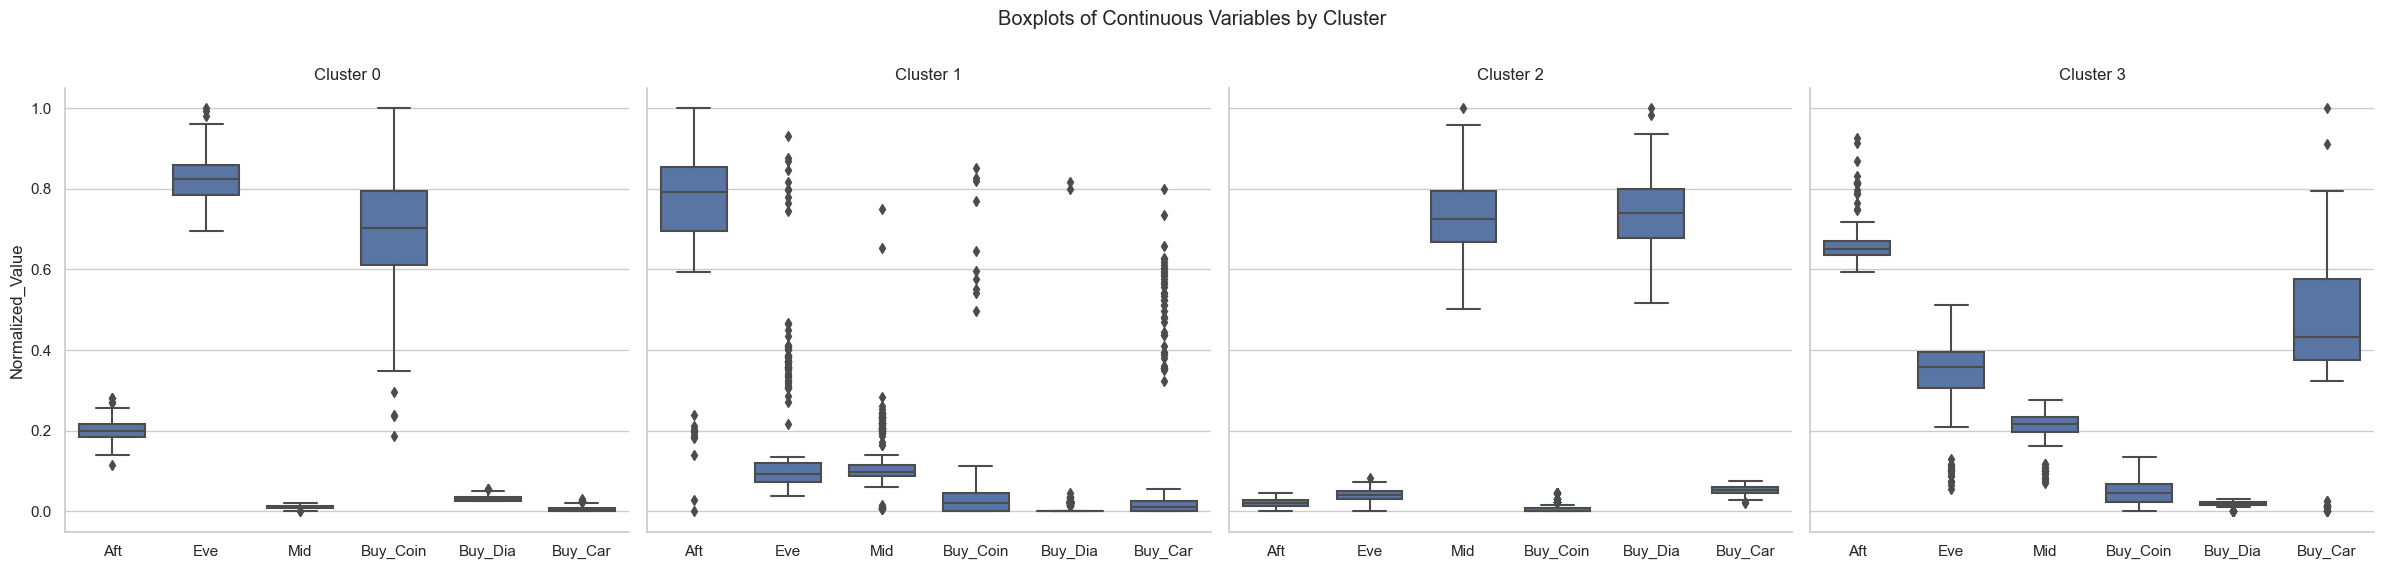

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

ClusterResultForPlot = pd.melt(
    ClusterResult,
    id_vars=["Identity_Novice", "Identity_Veteran", "Telecom_other", "Cluster"],
    value_vars=["Mid", "Aft", "Eve","Buy_Coin", "Buy_Dia", "Buy_Car"],
    var_name="Continuous_Variable",
    value_name="Normalized_Value",
)


ClusterResultForPlot["Continuous_Variable"] = pd.Categorical(
    ClusterResultForPlot["Continuous_Variable"],
    categories=[ "Aft", "Eve","Mid", "Buy_Coin", "Buy_Dia", "Buy_Car"],
    ordered=True,
)


g = sns.FacetGrid(ClusterResultForPlot, col="Cluster", height=6)
g.map_dataframe(sns.boxplot, x="Continuous_Variable", y="Normalized_Value", width=0.7)
g.set_axis_labels("", "Normalized_Value")
g.set_titles("Cluster {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Boxplots of Continuous Variables by Cluster")
plt.show()

C:\Users\Dear User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dear User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


0    390
1    239
2    158
3    133
Name: Cluster, dtype: int64


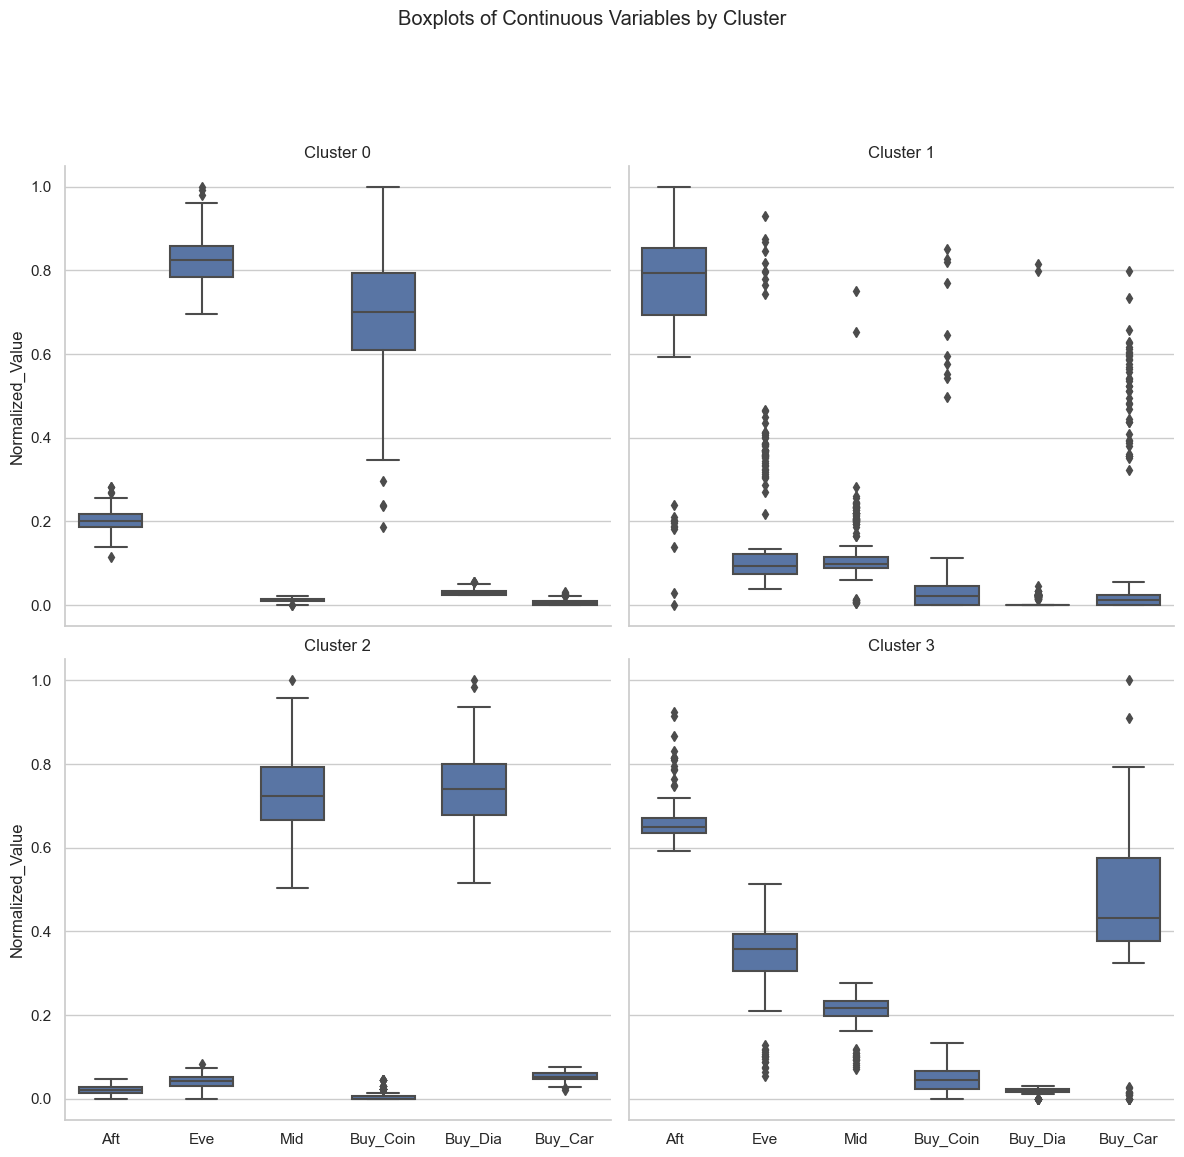

In [225]:
num_clusters = 4

# 設定隨機種子
np.random.seed(500)

# K-means 聚類
kmeans = KMeans(n_clusters=num_clusters)
K = kmeans.fit_predict(dummytable)

ClusterResult = pd.concat([dummytable, pd.Series(K, name="Cluster")], axis=1)

# 更改Cluster列的名稱
ClusterResult.rename(columns={ClusterResult.columns[-1]: "Cluster"}, inplace=True)

# 打印每個群組的計數
print(ClusterResult["Cluster"].value_counts())

ClusterResultForPlot = pd.melt(
    ClusterResult,
    id_vars=["Identity_Novice", "Identity_Veteran", "Telecom_other", "Cluster"],
    value_vars=["Mid", "Aft", "Eve","Buy_Coin", "Buy_Dia", "Buy_Car"],
    var_name="Continuous_Variable",
    value_name="Normalized_Value",
)

# 指定 Continuous_Variable 列的順序
ClusterResultForPlot["Continuous_Variable"] = pd.Categorical(
    ClusterResultForPlot["Continuous_Variable"],
    categories=[ "Aft", "Eve","Mid","Buy_Coin", "Buy_Dia", "Buy_Car"],
    ordered=True,
)

# 使用FacetGrid創建三張子圖
g = sns.FacetGrid(ClusterResultForPlot, col="Cluster", col_wrap=2,height=6)
g.map_dataframe(sns.boxplot, x="Continuous_Variable", y="Normalized_Value", width=0.7)
g.set_axis_labels("", "Normalized_Value")
g.set_titles("Cluster {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Boxplots of Continuous Variables by Cluster")
plt.show()


In [212]:
kmeans = KMeans(n_clusters=4, random_state=0) 
game_result = game.groupby('User_Id').agg({
    "Min_Aft":["mean"],
    "Min_Eve":["mean"],
    "Min_Mid":["mean"],
    "Buy_Coin":["mean"],
    "Buy_Dia":["mean"],
    "Buy_Car":["mean"]
}).reset_index()

game_result.columns = game_result.columns.get_level_values(0)
game_result.columns= ['User_Id','Aft', 'Eve', 'Mid', 'Buy_Coin', 'Buy_Dia', 'Buy_Car']

kmeans.fit(game_result[['Aft', 'Eve', 'Mid', 'Buy_Coin', 'Buy_Dia', 'Buy_Car']])
print(game_result)
clusters = kmeans.labels_
game_result['Cluster'] = clusters
game_result = pd.merge(game_result, user, on='User_Id', how='inner')


game_result.rename(columns={gametable_result.columns[-1]: "Cluster"}, inplace=True)
print(game_result)


C:\Users\Dear User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dear User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


        User_Id   Aft   Eve    Mid  Buy_Coin  Buy_Dia  Buy_Car
0    021ViplNqr  16.4  80.2    8.2     176.8     28.0      0.0
1    03DaAFruM2  13.8  80.8    6.0     264.8     20.0      8.0
2    0AqrYZIKVB  15.2  76.2    7.2     228.8     20.0      4.0
3    0Cw2x0rNm9  47.8  17.4   18.4       6.8      0.0     13.0
4    0JhnZ3cyxP  13.2  83.4    5.6     182.6     20.0      3.2
..          ...   ...   ...    ...       ...      ...      ...
915  zddE9Vt5v3  41.2  39.4   39.6      18.0     17.0    257.0
916  zoPLZ1eZPD  13.2  73.6    7.8     209.8     20.0      0.0
917  zs8XSoqV79   4.8  10.0  113.4       0.0    578.6     29.8
918  ztJz2mddgZ  47.4  14.6   18.6       0.0      0.0      0.0
919  zwaxmpXnqk  13.4  75.8    7.4     171.4     32.0      3.6

[920 rows x 7 columns]
        User_Id   Aft   Eve    Mid  Buy_Coin  Buy_Dia  Buy_Car  Cluster  \
0    021ViplNqr  16.4  80.2    8.2     176.8     28.0      0.0        0   
1    03DaAFruM2  13.8  80.8    6.0     264.8     20.0      8.0        

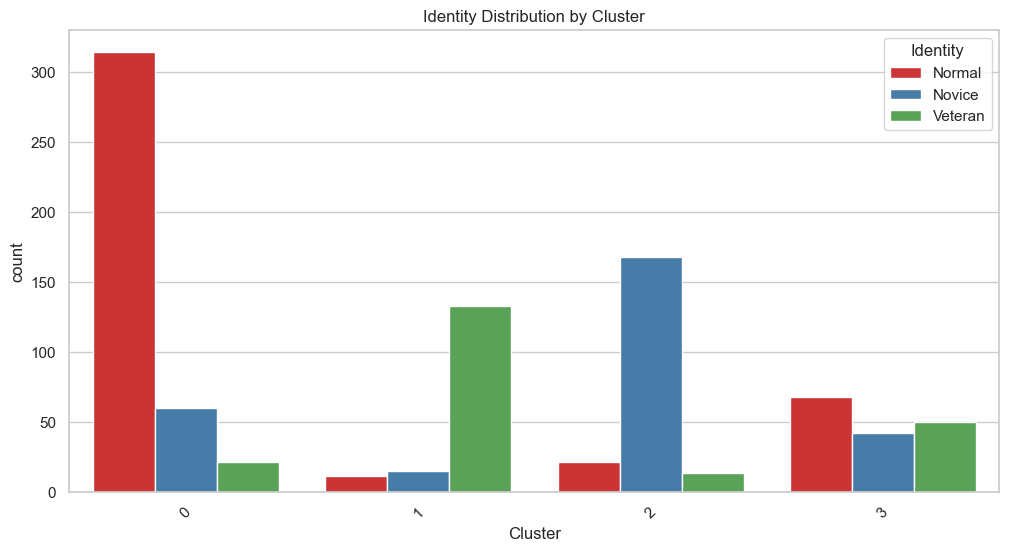

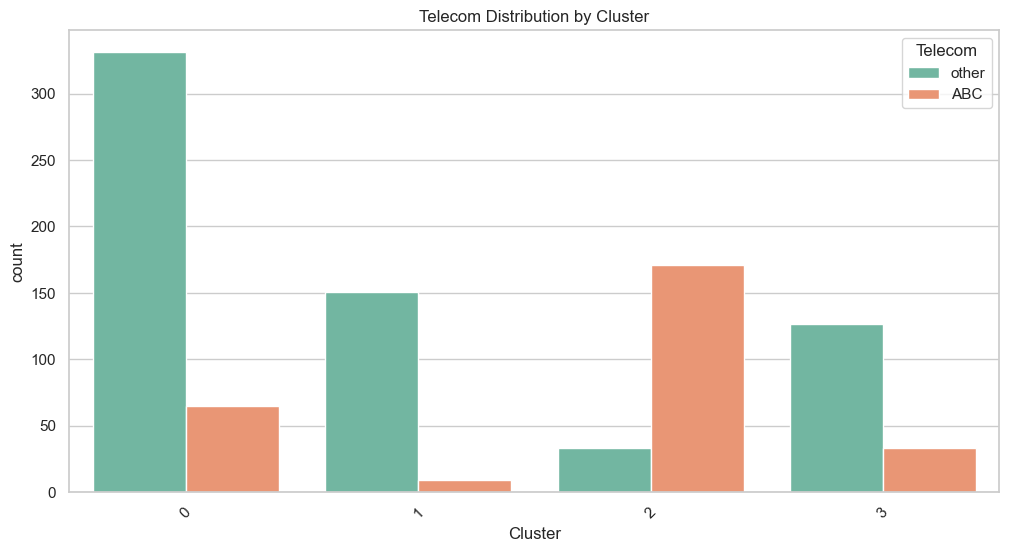

In [220]:
game_result['Cluster'] = pd.Categorical(game_result['Cluster'], categories=[0, 1, 2, 3], ordered=True)

# 繪製 Identity 的分布圖
plt.figure(figsize=(12, 6))
sns.countplot(data=game_result, x='Cluster', hue="Identity", palette='Set1')
plt.title('Identity Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=game_result, x="Cluster", hue="Telecom", palette='Set2')
plt.title('Telecom Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()


In [244]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

test_data=game_result.copy()
level= {
    'Novice': 1,
    'Veteran': 3,
    'Normal': 2
}

test_data["Cluster"] = test_data["Cluster"].astype(int)
test_data["Identity"]=test_data["Identity"].map(level)

model = ols('Cluster  ~ Aft +Eve+ Mid +Buy_Coin+ Buy_Dia +Buy_Car+ Identity', data=test_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
#玩家遊玩程度並非群體分組的標準,代表在制定策略時可以更注重時間段、虛擬寶物等因素,以增加對不同群體的影響力

             sum_sq     df            F         PR(>F)
Aft       11.381467    1.0   288.337791   2.114920e-56
Eve        0.230568    1.0     5.841204   1.585046e-02
Mid        2.397172    1.0    60.729885   1.780042e-14
Buy_Coin   6.241248    1.0   158.115605   1.484571e-33
Buy_Dia    0.352870    1.0     8.939600   2.865486e-03
Buy_Car   69.245306    1.0  1754.258754  1.144673e-214
Identity   0.064173    1.0     1.625761   2.026151e-01
Residual  35.999090  912.0          NaN            NaN


In [277]:
#切分不同群體
cluster0_data = test_data.loc[test_data['Cluster'] == 0]
cluster1_data = test_data.loc[test_data['Cluster'] == 1]
cluster2_data = test_data.loc[test_data['Cluster'] == 2]
cluster3_data = test_data.loc[test_data['Cluster'] == 3]

def anova(cluster_data):
    formula = 'Cluster ~ Aft + Eve + Mid + Buy_Coin + Buy_Dia + Buy_Car + Identity'
    model = ols(formula, data=cluster_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table

anova(cluster0_data)
# anova(cluster1_data)
# anova(cluster2_data)
# anova(cluster3_data)
print(cluster0_data)

        User_Id   Aft   Eve  Mid  Buy_Coin  Buy_Dia  Buy_Car  Cluster  \
0    021ViplNqr  16.4  80.2  8.2     176.8     28.0      0.0        0   
1    03DaAFruM2  13.8  80.8  6.0     264.8     20.0      8.0        0   
2    0AqrYZIKVB  15.2  76.2  7.2     228.8     20.0      4.0        0   
4    0JhnZ3cyxP  13.2  83.4  5.6     182.6     20.0      3.2        0   
6    0Wsfmn5Gac  16.4  77.2  6.8     171.0     20.0      4.0        0   
..          ...   ...   ...  ...       ...      ...      ...      ...   
911  zGjJgNHCV7  15.8  71.4  6.6     195.6     28.0      3.2        0   
912  zIKnsOp6tS  13.6  83.8  5.8     125.2     20.0      0.0        0   
913  zaoH5wezc5  14.0  82.4  7.4     185.6     20.0      4.4        0   
916  zoPLZ1eZPD  13.2  73.6  7.8     209.8     20.0      0.0        0   
919  zwaxmpXnqk  13.4  75.8  7.4     171.4     32.0      3.6        0   

     Identity Telecom  
0           2   other  
1           1   other  
2           1     ABC  
4           2   other  
6  

C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covar

In [282]:
num_clusters = 4


for cluster_id in range(num_clusters):
   
    cluster_data = test_data.loc[test_data['Cluster'] == cluster_id]
    
    formula = 'Cluster ~ Aft + Eve + Mid + Buy_Coin + Buy_Dia + Buy_Car + Identity'
    model = ols(formula, data=cluster_data).fit()
    
    print(f'Cluster {cluster_id} ANOVA:')
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    


Cluster 0 ANOVA:
          sum_sq     df   F  PR(>F)
Aft          NaN    1.0 NaN     NaN
Eve          NaN    1.0 NaN     NaN
Mid          NaN    1.0 NaN     NaN
Buy_Coin     NaN    1.0 NaN     NaN
Buy_Dia      NaN    1.0 NaN     NaN
Buy_Car      NaN    1.0 NaN     NaN
Identity     NaN    1.0 NaN     NaN
Residual     0.0  388.0 NaN     NaN
Cluster 1 ANOVA:
                sum_sq     df         F    PR(>F)
Aft       5.993345e-32    1.0  0.001095  0.973648
Eve       1.791995e-32    1.0  0.000327  0.985589
Mid       2.461838e-30    1.0  0.044970  0.832344
Buy_Coin  5.025457e-31    1.0  0.009180  0.923796
Buy_Dia   9.936477e-29    1.0  1.815075  0.179906
Buy_Car   5.523876e-31    1.0  0.010090  0.920119
Identity  1.039797e-30    1.0  0.018994  0.890567
Residual  8.321114e-27  152.0       NaN       NaN
Cluster 2 ANOVA:
                sum_sq     df           F        PR(>F)
Aft       1.525775e-29    1.0    0.270538  6.035580e-01
Eve       2.820088e-28    1.0    5.000355  2.646956e-02
Mid    

C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Dear User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covar

In [281]:
from scipy.stats import kruskal

# 創建一個包含所有群集資料的列表
all_clusters_data = [cluster0_data, cluster1_data, cluster2_data, cluster3_data]

# 進行 Kruskal-Wallis 檢定
statistic, p_value = kruskal(*all_clusters_data)

# 顯示結果
print("Kruskal-Wallis 統計量:", statistic)
print("p-值:", p_value)

# 判斷結果
alpha = 0.05  # 顯著性水平
if(p_value < alpha).any():
    print("拒絕虛無假設：組之間存在顯著差異")
else:
    print("未能拒絕虛無假設：組之間沒有顯著差異")


Kruskal-Wallis 統計量: [  7.53820454 813.59851234 806.04366121 819.80545846 752.93382018
 780.65068168 679.64345016 919.         369.8878798  366.26087575]
p-值: [5.65848970e-002 4.86413646e-176 2.11592381e-174 2.19195094e-177
 6.97256308e-163 6.80114475e-169 5.44525467e-147 6.69507099e-199
 7.36227360e-080 4.49239176e-079]
拒絕虛無假設：組之間存在顯著差異
